In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow.keras as keras

In [6]:
mnist = keras.datasets.mnist
(images_train,labels_train),(images_test,labels_test) = mnist.load_data()
labels_train

11493376/11490434 [==============================] - 49s 4us/step


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
class_names = ["zero","one","two","three","four","five","six","seven","eight","nine"]
class_names

['zero',
 'one',
 'two',
 'three',
 'four',
 'five',
 'six',
 'seven',
 'eight',
 'nine']

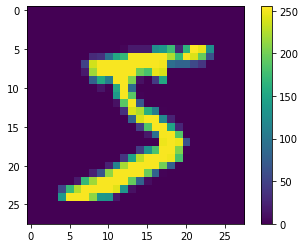

In [8]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.show()

In [13]:
def showImages(num,images,labels):
    for i in range(num):
        plt.figure()
        plt.imshow(images[i])
        plt.colorbar()
        plt.xlabel("classification label : {}".format(labels[i]))
        plt.show()

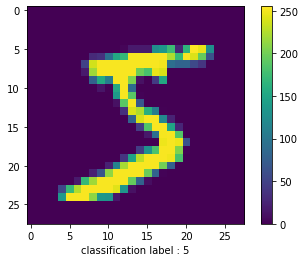

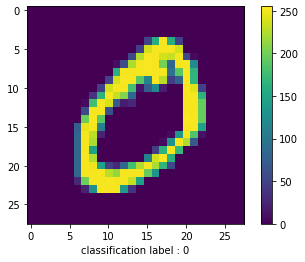

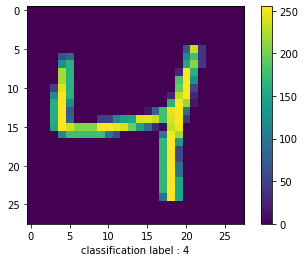

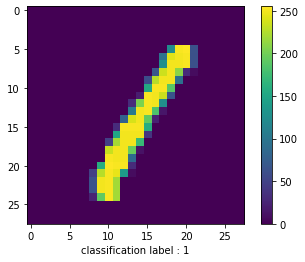

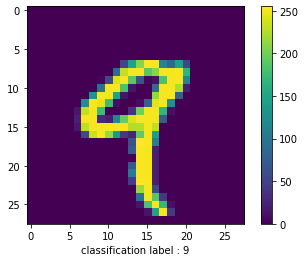

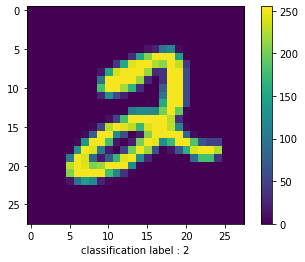

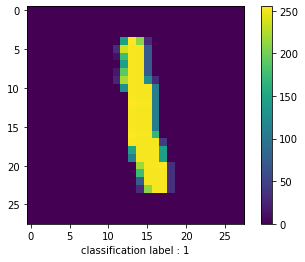

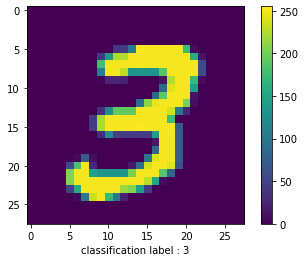

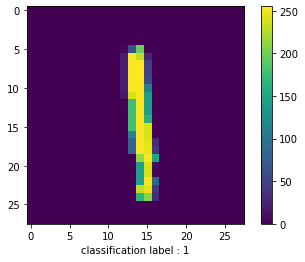

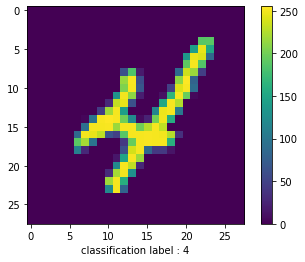

In [14]:
showImages(10,images_train,labels_train)

In [16]:
images_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Normalize our dataset between 0 - 1

In [17]:
images_test = images_test /255
images_train = images_train /255

In [19]:
type(images_train[0])

numpy.ndarray

In [20]:
images_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
images_train[0].shape

(28, 28)

* Build Our model

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [23]:
model

In [24]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001,name='Adamax')
optimizer

In [26]:
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(images_train,labels_train,epochs=32)

Epoch 1/32
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2504 - accuracy: 0.9241
Epoch 2/32
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1087 - accuracy: 0.9668
Epoch 3/32
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0767 - accuracy: 0.9762
Epoch 4/32
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0577 - accuracy: 0.9818
Epoch 5/32
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0458 - accuracy: 0.9852
Epoch 6/32
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0360 - accuracy: 0.9882
Epoch 7/32
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0310 - accuracy: 0.9903
Epoch 8/32
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 9/32
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0204 - accuracy: 0.9934
Epoch 10/32
1875/1875 [==============================] - 44s 24m

In [28]:
kearas_file = "digit.h5"
tf.keras.models.save_model(model,kearas_file)

In [31]:
### Saving our model in Tflite format

In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("digit.tflite","wb").write(tfmodel)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\Shri\AppData\Local\Temp\tmpr7jeh9nz\assets


5830980